# Image Classification with TensorFlow in Machine Learning

https://thecleverprogrammer.com/2020/08/30/image-classification-with-tensorflow-in-machine-learning/

In this article, I am going to explain how we can train a neural network model for the task of image classification with TensorFlow. For those new to TensorFlow, TensorFlow is an end-to-end open-source platform for machine learning. It has a comprehensive and flexible ecosystem of tools, libraries, and community resources that allow researchers to push cutting-edge advancements in ML, and developers to easily build and deploy machine learning-based applications.

In [11]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

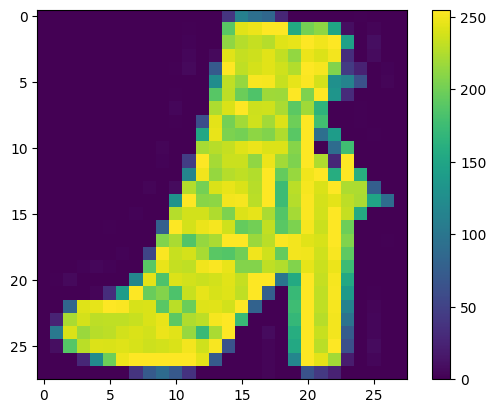

In [18]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

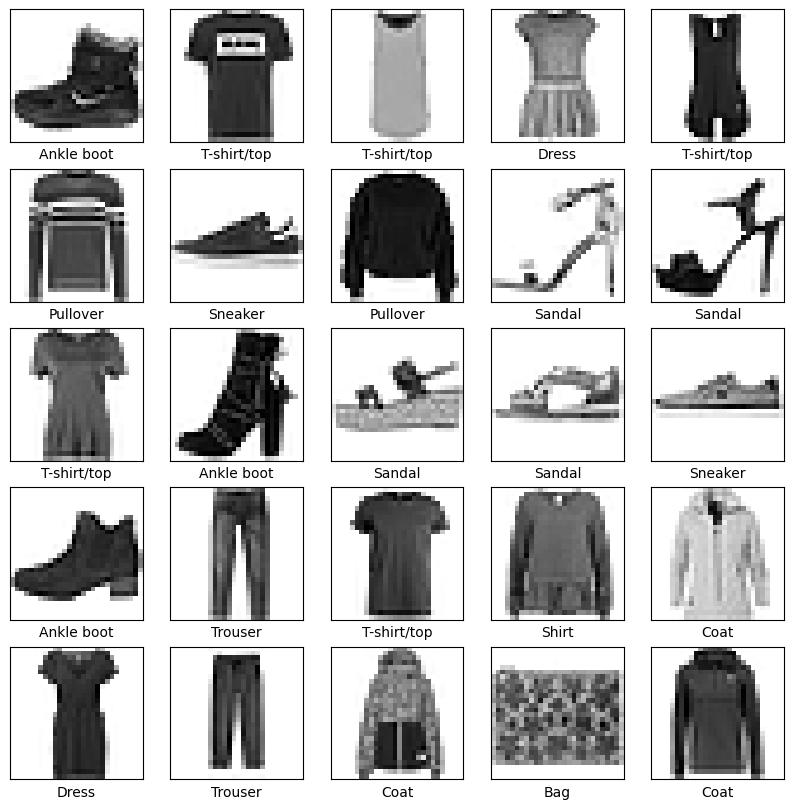

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [24]:
test_images = test_images.astype("float32")
train_images = train_images.astype("float32")

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential()
model.add(Dense(10,activation='relu')) #sütun sayısı 8 olduğu için 8 ie başladık.8 nörona bağladık demektir
model.add(Dense(120,activation='relu')) #120 nörona bağladık
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(10,activation='sigmoid')) #sigmoid = sonucu 1 veya 0 olacağı için bu aktivasyon kodu kullandık
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, batch_size=120, epochs=40, verbose=1, validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6603 - loss: 1.0099 - val_accuracy: 0.8114 - val_loss: 0.5708
Epoch 2/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8257 - loss: 0.5279 - val_accuracy: 0.8269 - val_loss: 0.5107
Epoch 3/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8404 - loss: 0.4776 - val_accuracy: 0.8302 - val_loss: 0.4919
Epoch 4/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8456 - loss: 0.4533 - val_accuracy: 0.8309 - val_loss: 0.4860
Epoch 5/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8486 - loss: 0.4416 - val_accuracy: 0.8387 - val_loss: 0.4669
Epoch 6/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.4286 - val_accuracy: 0.8394 - val_loss: 0.4658
Epoch 7/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.4169 - val_accuracy: 0.8409 - val_loss: 0.4577
Epoch 8/40
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.4167 - val_accuracy: 0.

In [30]:
#Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([0.08747176, 0.08747171, 0.08747283, 0.08747213, 0.08747198,
       0.09975524, 0.08747403, 0.09344718, 0.08801505, 0.19394809],
      dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

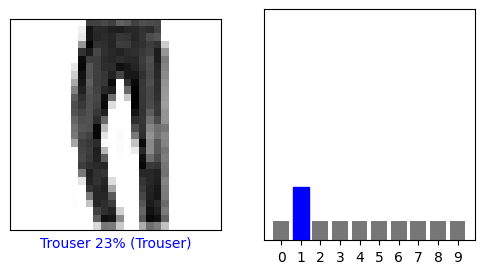

In [34]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

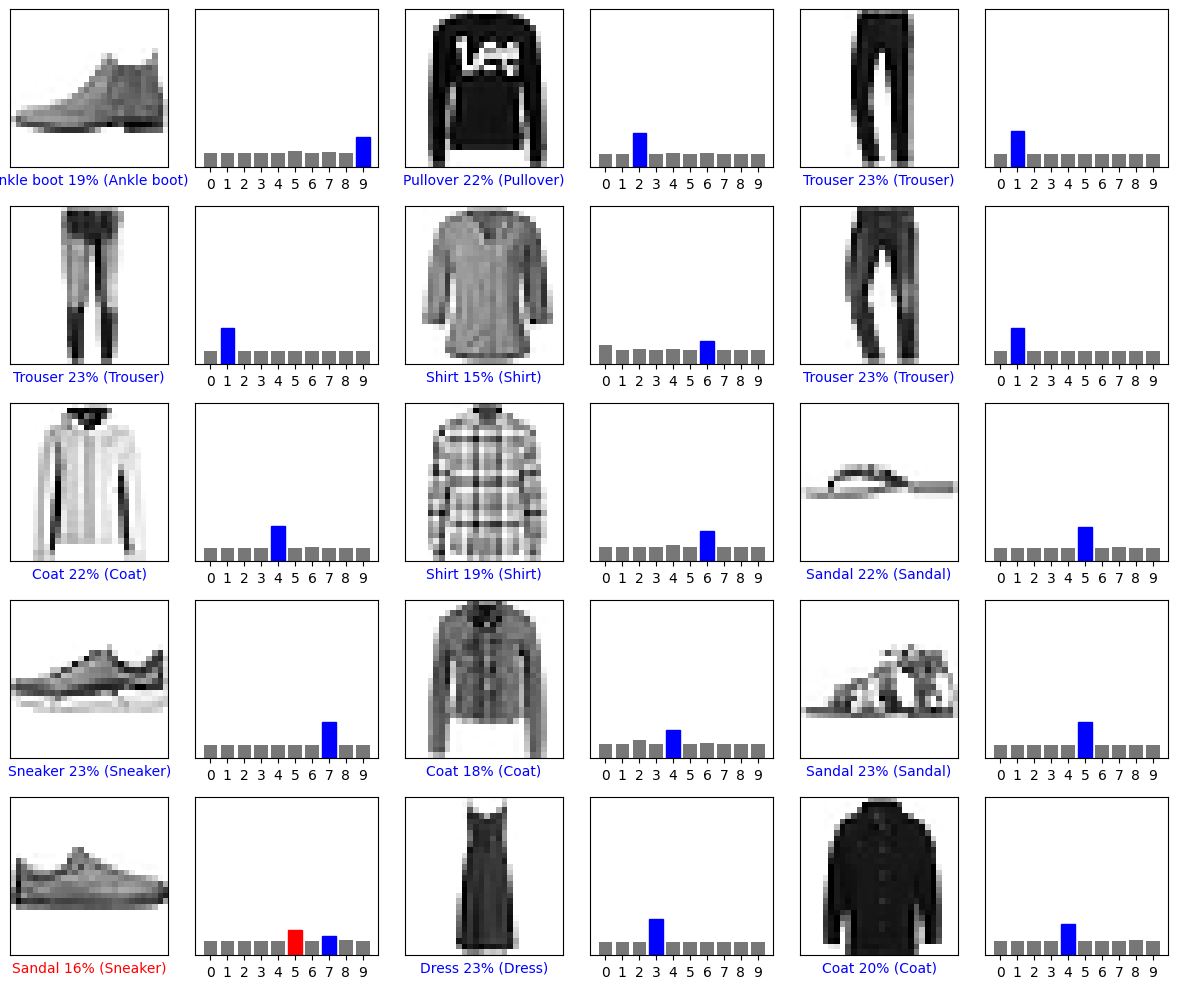

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()